# Kung Fu Pandas Report
-------------------
### Authors:
Piotr Balewski \
Adam Dobosz \
Wiktor Kamzela \
Michał Redmer 

## Introduction
As a team, our goal will be to implement methods learned during Data Mining course in order to obtain the most accurate regression model, predicting the price of a car.
Multiple preprocessing techniques will be utilized in the following experiments; feature normalization, standardization, selection and extraction. These techniques are crucial for transforming raw data into a format suitable for training machine learning models.

## Description of the dataset

The dataset under consideration, ["90,000+ Cars Data From 1970 to 2024"](https://www.kaggle.com/datasets/meruvulikith/90000-cars-data-from-1970-to-2024), offers a comprehensive collection of car-related information spanning several decades. With over 90,000 entries and 10 columns, this dataset provides a rich source of data for our analysis. The original dataset comprising 100,000 scraped used car listings was collected and cleaned by Aditya.
Due to its recent availability of only 2 months, hopefully we will be able to discover plenty of new, unexpected and insightful relationships.


## Description of the input features

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('CarsData.csv')
target = data.price
input_features = data.drop('price', axis=1)

Input comprise 9 features:
1. model
2. year
3. transmissions
4. mileage,
5. fuelType,
6. tax,
7. mpg,
8. engineSize,
9. Manufacturer, 

5 of them being numerical and 4 categorical.

## Exploratory Analysis of the input features

Let's take a glance at the data:

In [2]:
input_features.head()

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer
0,I10,2017,Manual,11630,Petrol,145,60.1,1.0,hyundi
1,Polo,2017,Manual,9200,Petrol,145,58.9,1.0,volkswagen
2,2 Series,2019,Semi-Auto,1614,Diesel,145,49.6,2.0,BMW
3,Yeti Outdoor,2017,Manual,30960,Diesel,150,62.8,2.0,skoda
4,Fiesta,2017,Manual,19353,Petrol,125,54.3,1.2,ford


Now, we will inspect each column for missing values and incoherent datatypes.

In [3]:
input_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97712 entries, 0 to 97711
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         97712 non-null  object 
 1   year          97712 non-null  int64  
 2   transmission  97712 non-null  object 
 3   mileage       97712 non-null  int64  
 4   fuelType      97712 non-null  object 
 5   tax           97712 non-null  int64  
 6   mpg           97712 non-null  float64
 7   engineSize    97712 non-null  float64
 8   Manufacturer  97712 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 6.7+ MB


Fortunately, there are no missing values in our dataset. Furthermore, we can see the number of entries (97712) and the number of input features (9). Additionally, we can now divide our features into numerical and categorical.

In [4]:
num_cols = ['year', 'mileage', 'tax', 'mpg', 'engineSize']
cat_cols = ['model', 'transmission', 'fuelType',  'Manufacturer']

Now we will explore the distributions of numerical data.

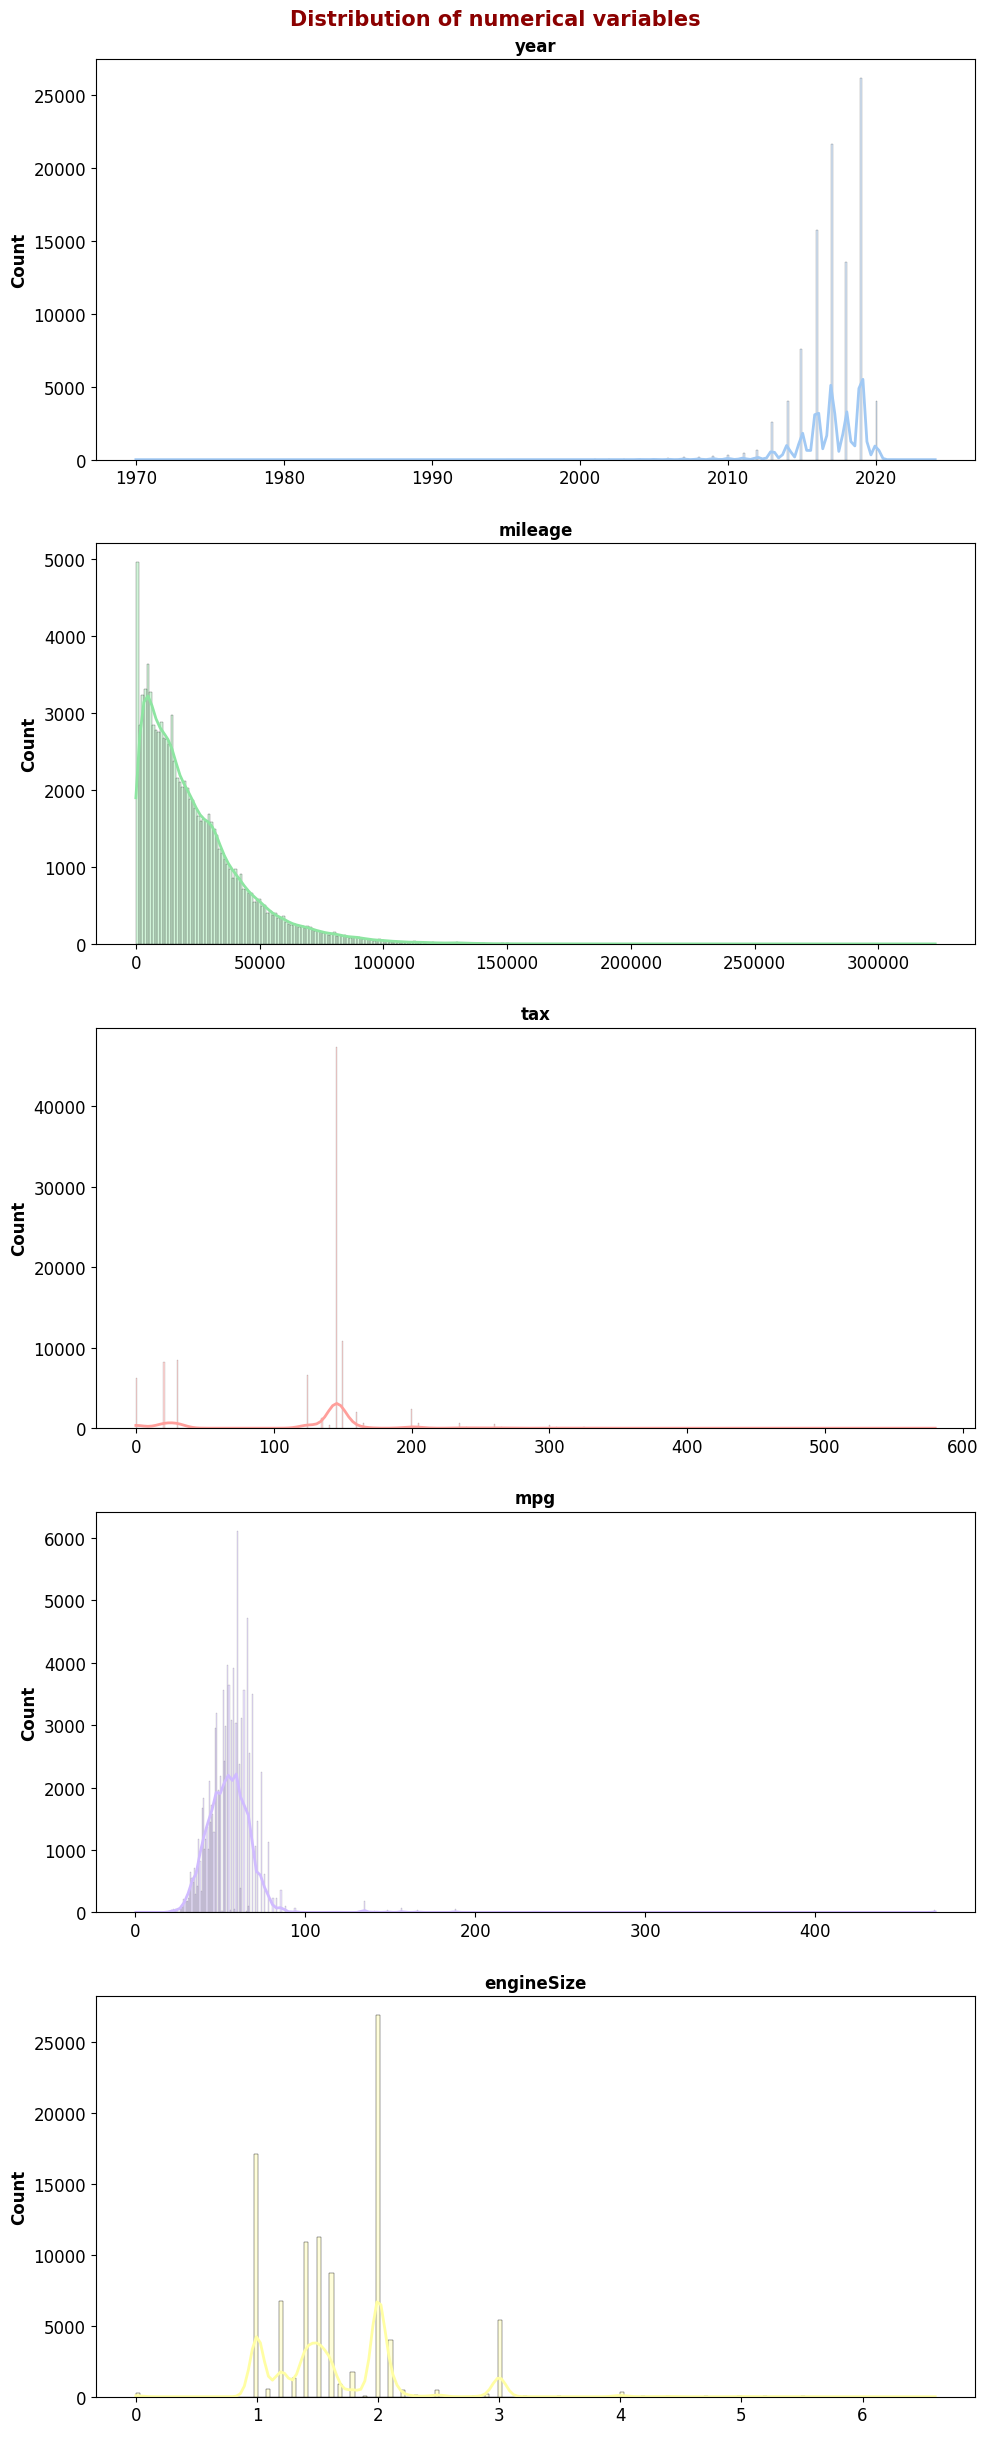

In [5]:
fig, axes = plt.subplots(5, 1, figsize=(10, 25))
axes = axes.flat # flatten the axis to iterate over them

for i, col in enumerate(num_cols):
    sns.histplot(data=input_features,
        x=col,
        stat='count',
        kde=True, # smoothen the histogram
        color=sns.color_palette('pastel6')[i],
        line_kws={'linewidth': 2},
        alpha=0.4,
        ax=axes[i])

    axes[i].set_xlabel(" ")
    axes[i].set_ylabel("Count", fontsize=12, fontweight='bold', color='black')
    axes[i].set_title(col, fontsize=12, fontweight='bold', color='black')
    axes[i].tick_params(labelsize=12)

fig.suptitle('Distribution of numerical variables', fontsize=15, fontweight='bold', color='darkred')
fig.tight_layout()
fig.subplots_adjust(top=0.96)
plt.show()

Great. Let's take a look at the distribution of categorical variables.

/tmp/ipykernel_2048/3095670124.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=input_features, x=col, palette='pastel', ax=axes[i])
/tmp/ipykernel_2048/3095670124.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=input_features, x=col, palette='pastel', ax=axes[i])
/tmp/ipykernel_2048/3095670124.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=input_features, x=col, palette='pastel', ax=axes[i])
/tmp/ipykernel_2048/3095670124.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will

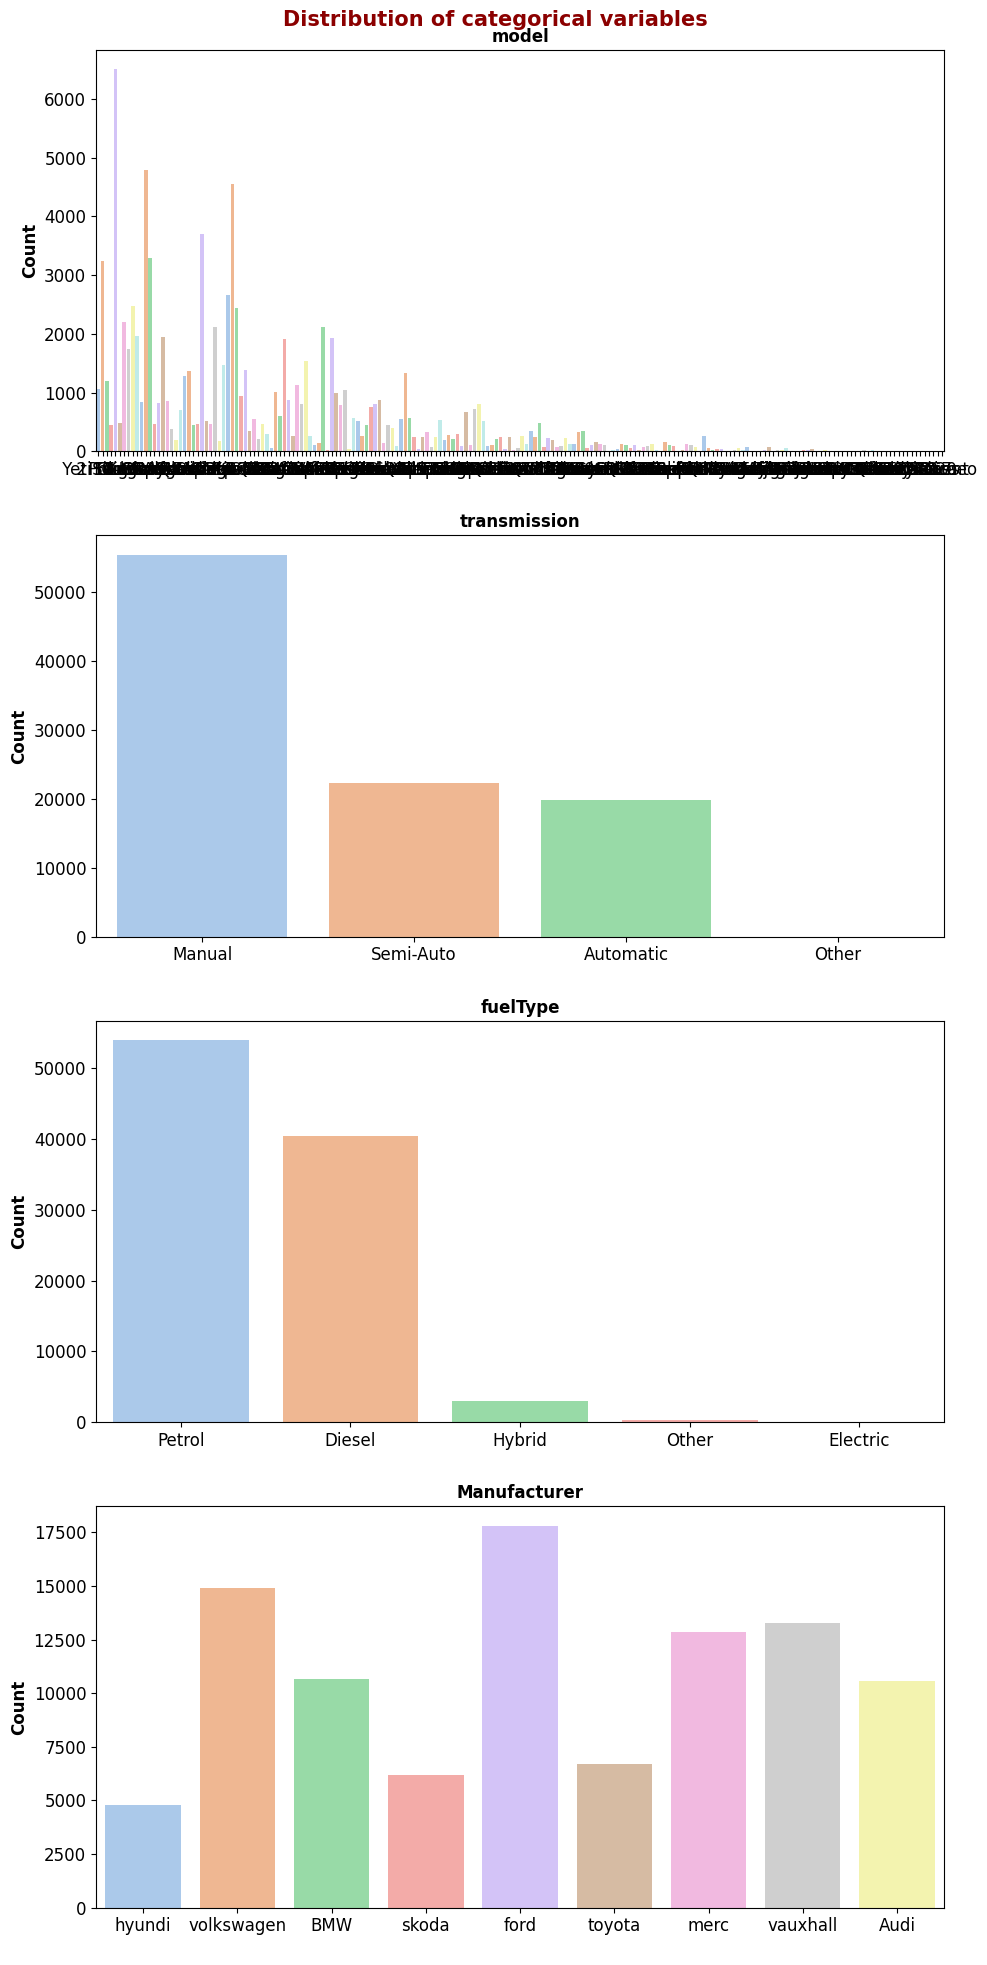

In [6]:
fig, axes = plt.subplots(4, 1, figsize=(10, 20))
axes = axes.flat

for i, col in enumerate(cat_cols):
    # add countplot for each categorical column
    sns.countplot(data=input_features, x=col, palette='pastel', ax=axes[i])
    axes[i].set_xlabel(" ")
    axes[i].set_ylabel("Count", fontsize=12, fontweight='bold', color='black')
    axes[i].set_title(col, fontsize=12, fontweight='bold', color='black')
    axes[i].tick_params(labelsize=12)

fig.suptitle('Distribution of categorical variables', fontsize=15, fontweight='bold', color='darkred')
fig.tight_layout()
fig.subplots_adjust(top=0.96)
plt.show()

As we can see, there is only a relatively small variety of categories in each column, except for the model. We will need to figure out a way to make it more convienient, such that it is easier to interpret and won't overfit the model.

In [7]:
print(data.model.nunique()) # number of unique values in model column
# print only values of model column that constitute over 1% of the data
models_over_1percent = data.model.value_counts(normalize=True)[data.model.value_counts(normalize=True) > 0.01]
print(len(models_over_1percent))
# sum of all values that are over 1%
print(models_over_1percent.sum())

196
29
0.6588852955624692


That's interesting, isn't it? 15% of all models contribute to almost 66% of the whole dataset! Let's find the most informative 

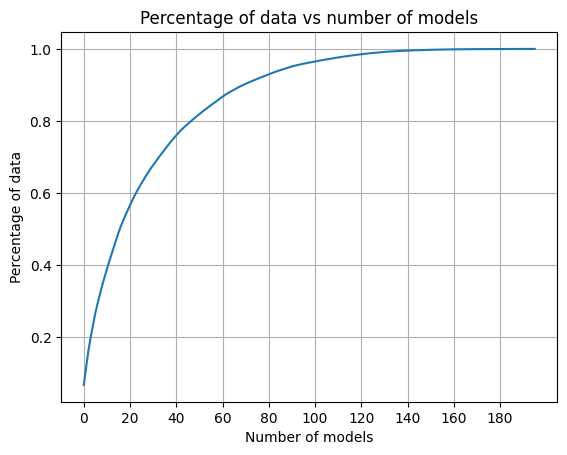

In [8]:
# plot number of models vs their count
data_percent_vs_num_of_models = []
for i in range(len(data.model.value_counts())):
    data_percent_vs_num_of_models.append(data.model.value_counts(normalize=True).iloc[:i+1].sum())
plt.plot([i for i in range(len(data.model.value_counts()))], data_percent_vs_num_of_models)
plt.grid()
plt.xticks([i for i in range(0, len(data.model.value_counts()), 20)])
plt.xlabel('Number of models')
plt.ylabel('Percentage of data')
plt.title('Percentage of data vs number of models')
plt.show()

As we can see, the elbow is not obvious, however we can select a desired threshold value easily.

Furthermore, we can look for correlation between pairs of variables using pairplot!

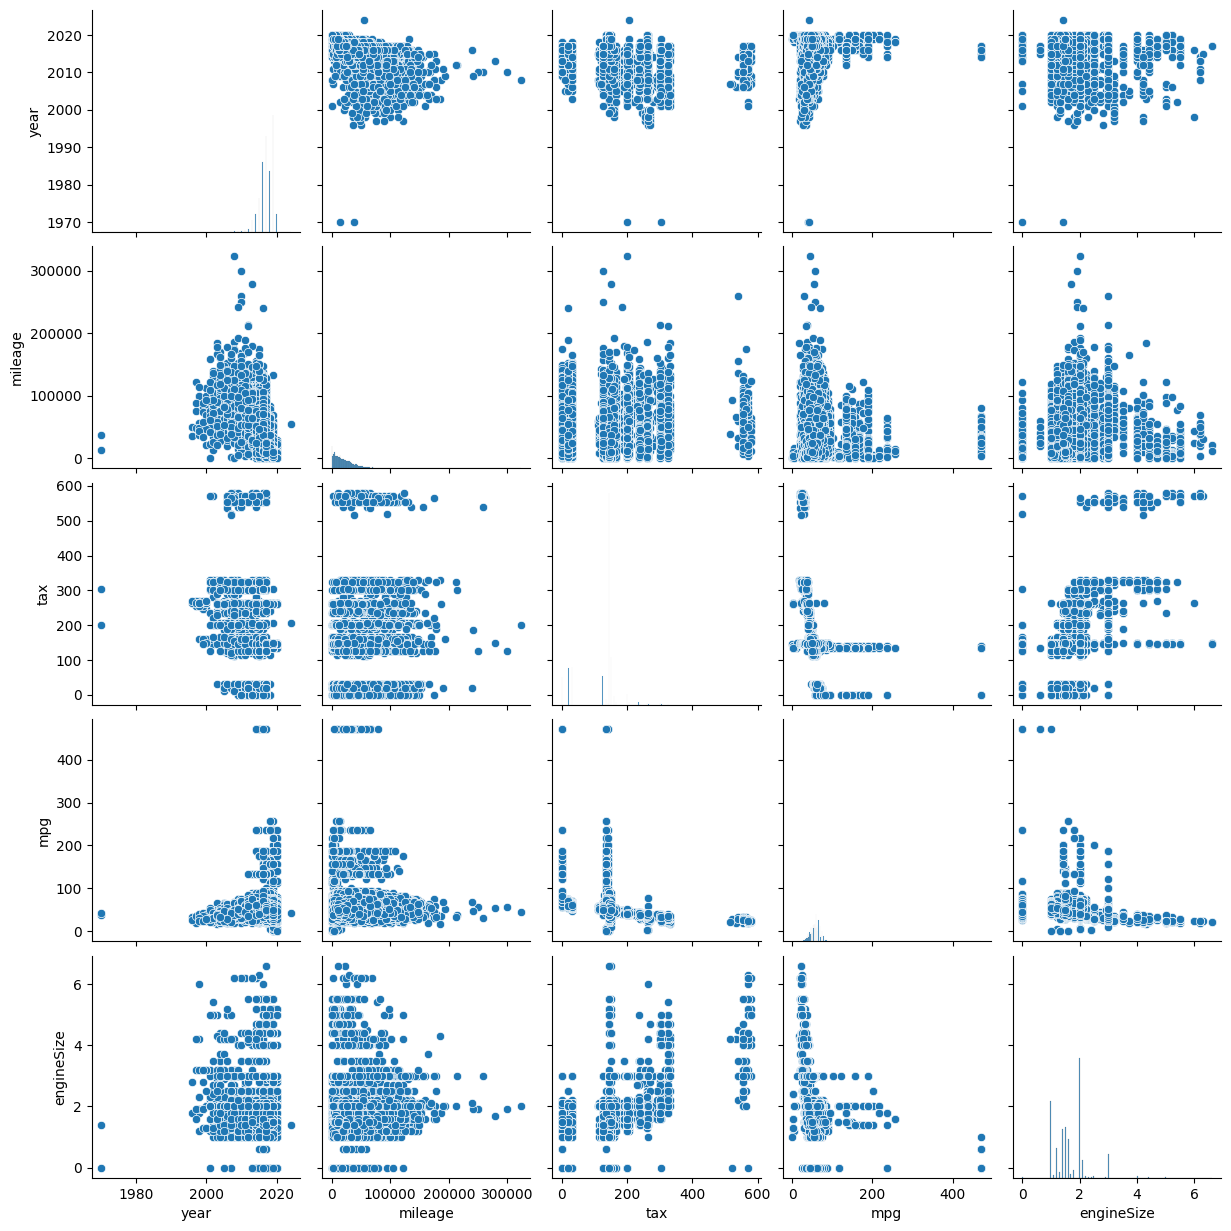

In [9]:
import seaborn as sns

sns.pairplot(input_features)

## Preprocessing techniques used in the assignment
### Description
We used several preprocessing techniques in our project for the purpose of amplifing our model's results.
The process should be divided into two stages:
#### Numerical data
Following methods were applied to the numerical data:
- standardization
#### Categorical data
When it comes to the categorical data, we used OneHotEncoding in order to express qualitative attributes in a suitable way for machine learning algorithm. It is worth mentioning that **model** column had almost 200 unique values, making it problematic to say the least. However, we didn't decide to set a threshold directly on models; all of the models were included in the OHE, yet we pruned it afterwards, based on the value of variance in each of the column. To be exact, the threshold was 0.01.

### Motivation
Data preprocessing is key in the regression process. It provides means to transform data in such a way that our model can easily work with it. Moreover, we limit the size of the data, while maintaining the information content. Our goal is to allow the model to accurately generalize unseen data, therefore avoiding overfitting. 

## Description of the output features 
Our output feature is the **price** column. As you can imagine, by default it is expressed in dollars.

## Exploratory analysis of the output features

In [10]:
target.info()

<class 'pandas.core.series.Series'>
RangeIndex: 97712 entries, 0 to 97711
Series name: price
Non-Null Count  Dtype
--------------  -----
97712 non-null  int64
dtypes: int64(1)
memory usage: 763.5 KB


As we can see above, there are no null values. Datatype is int64.

Let's inspect the distribution of our target variable.

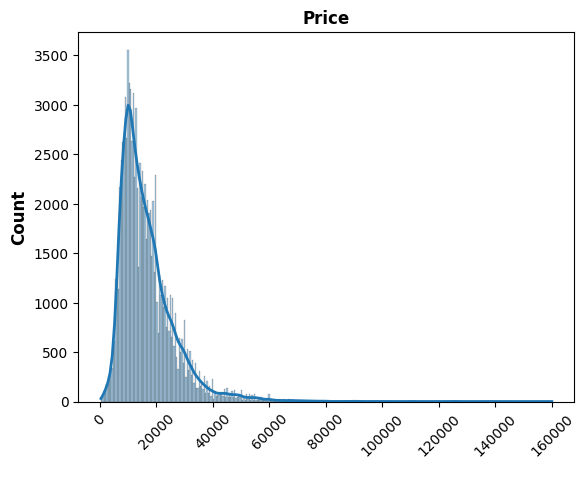

In [20]:
sns.histplot(x=target,
             stat='count',
             kde=True,
             line_kws={'linewidth': 2},
             alpha=0.4)
plt.xlabel(" ")
plt.ylabel("Count", fontsize=12, fontweight='bold', color='black')
plt.title("Price", fontsize=12, fontweight='bold', color='black')
plt.tick_params(labelsize=10)
plt.xticks(rotation=45)
plt.show()

As we can see, the data can be assumed as normally distributed. Now we will take a look at some summary statistics.

In [12]:
target.describe()

count     97712.000000
mean      16773.487555
std        9868.552222
min         450.000000
25%        9999.000000
50%       14470.000000
75%       20750.000000
max      159999.000000
Name: price, dtype: float64

Well, mean is calculated to be below 17k$, whereas maximum value is almost 10 times that number. Maybe we should take a closer look at this particular outlier?

In [13]:
data[target == max(target)]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer
92579,G Class,2020,159999,Semi-Auto,1350,Petrol,145,21.4,4.0,merc


As we can see, G Class Mercedes might be pretty expensive. 

Considering the outlier, histogram is a bit skewed due to unneccesarly long price range. Maybe boxplot would be more informative?

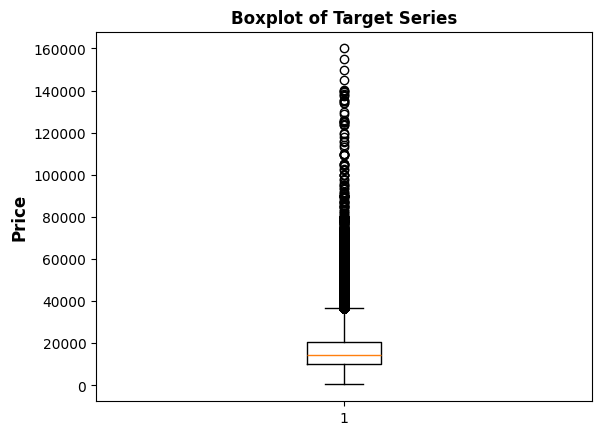

In [14]:
plt.boxplot(target)
plt.ylabel("Price", fontsize=12, fontweight='bold', color='black')
plt.title("Boxplot of Target Series", fontsize=12, fontweight='bold', color='black')
plt.tick_params(labelsize=10)
plt.show()

Great, now it would be useful to get some knowledge about correlated features:

Text(0.5, 1.0, 'Correlation Plot')

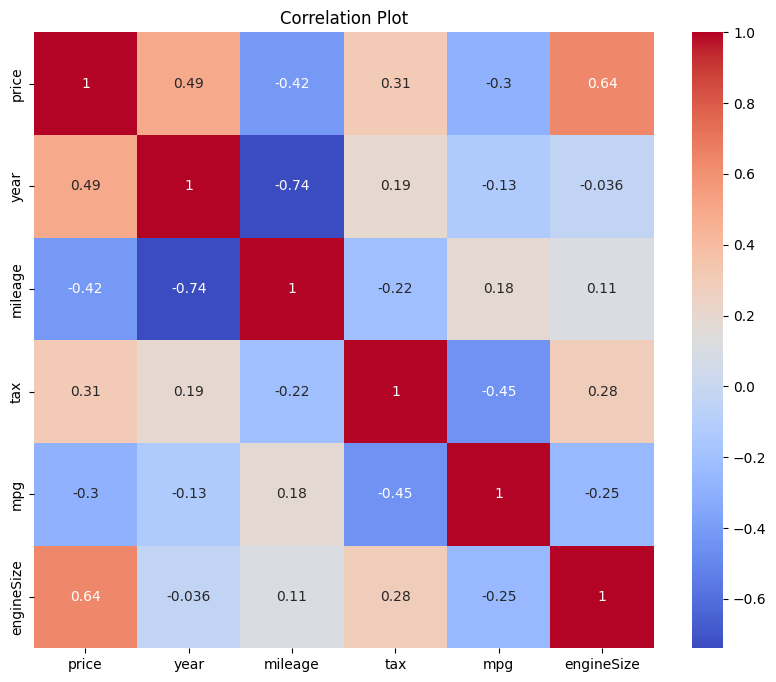

In [18]:
# Calculate the correlation matrix
corr_matrix = data[['price'] + num_cols].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Plot')


Based on the above plot we can notice that price is highly positively correlated with engineSize and year of production. Both of these findings are quite intuitive. Additionally, we can see that mileage is strongly negatively correlated to price. It is clear that used cars and high prices don't go along.

## Conclusions

Even though our dataset is relatively clean, it still required a lot of preprocessing work. The above exploration was an interesting endeveour and led to many informative inferences. Hopefully, with that knowledge, we will be able to create a well-performing machine learning model!